INFO:__main__:<__main__.Args object at 0x10d87d6d8>
INFO:__main__:<__main__.Args object at 0x10d87d6d8>
INFO:models.training_utils:loading model from path: model_outputs/v1/20190601-170049_10kepoch_FC


start
evaluate on training data


/usr/local/lib/python3.7/site-packages/torch/nn/functional.py:1332: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


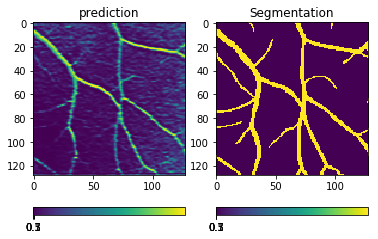

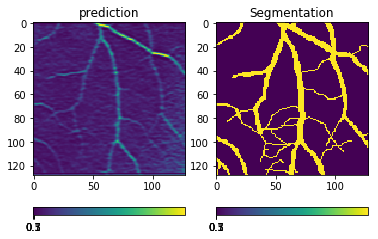

prediction success total 0.9067573547363281, zeros 0.9916626682826319, ones: 0.3352733212740633
evaluate on validation data


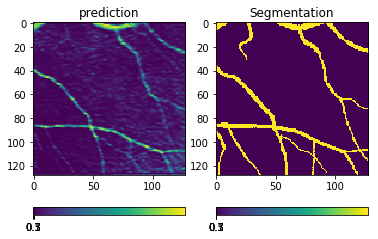

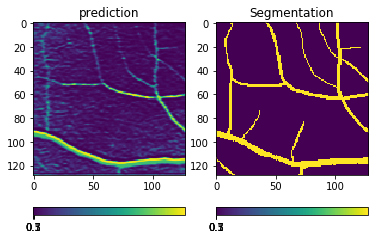

prediction success total 0.90838623046875, zeros 0.9858060277450564, ones: 0.4106391593553842


In [3]:
import logging

from models.training_utils import choose_model
from utils.const import Models_types
from utils.data_processing import load_input
from utils.evaluation import evaluate
import torch

logging.basicConfig(level=logging.DEBUG)
logging.getLogger().setLevel(logging.INFO)

logger = logging.getLogger(__name__)


class Args():
    def __init__(self):
        self.data_path = 'data/drive/training'
        self.data_path_training = 'data/drive/training'
        self.data_path_validation = 'data/drive/validation'
        self.data_path_test = 'data/drive/test'
        self.num_epochs = 10000
        self.batch_size = 1
        self.plot_loss = True
        self.num_workers = 4
        self.checkpoint_path = 'checkpoints/v1'
        self.is_save_model = False
        #model_load_path = None
        self.model_load_path = 'model_outputs/v1/20190601-170049_10kepoch_FC'
        self.display_images = True
        self.model_type = Models_types.FC
        self.device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        print("device:", self.device)
    

def main():
    print("start")
    args = Args()
    logger.info(args)

    logger.info(args)
    training_data, validation_data, test_data = load_input(args)
    model = choose_model(args, training_data, validation_data)
    # TEST
    evaluate(args, model, training_data, validation_data, test_data)

main()